<a href="https://colab.research.google.com/github/cappelchi/Video-Colorization/blob/master/Video_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Image Colorization API](https://deepai.org/machine-learning-model/colorizer)

In [16]:
!pip install youtube_dl

     |████████████████████████████████| 1.8MB 4.7MB/s 


In [0]:
import requests
import cv2
import numpy as np
import urllib
import os
from os.path import isfile, join
from __future__ import unicode_literals
import youtube_dl
import matplotlib.pyplot as plt
from google.colab import output
from IPython.display import YouTubeVideo

In [0]:
#Если нужно загружать видео с опциями
def my_hook(d):
    if d['status'] == 'finished':
        print('Done downloading, now converting ...')


ydl_opts = {
    #'format': 'bestaudio/best',
    #'postprocessors': [{
    #    'key': 'FFmpegExtractAudio',
    #    'preferredcodec': 'mp3',
    #    'preferredquality': '192',
    #}],
    #'logger': MyLogger(),
    'progress_hooks': [my_hook],
}

#Загружаем видео в Colab.

[youtube] FYHF3a9R5DY: Downloading webpage
[youtube] FYHF3a9R5DY: Downloading video info webpage


[download] Destination: May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.f247.webm
[download] 100% of 7.79MiB in 00:00
[download] Destination: May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.f140.m4a
[download] 100% of 815.70KiB in 00:00
[ffmpeg] Merging formats into "May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.mkv"
Deleting original file May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.f247.webm (pass -k to keep)
Deleting original file May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.f140.m4a (pass -k to keep)
[youtube] FYHF3a9R5DY: Downloading webpage
[youtube] FYHF3a9R5DY: Downloading video info webpage
Продолжительность: 53
Video ID: FYHF3a9R5DY
Название: May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w/ added sound)
Дата загрузки: 20180907
Количество пр

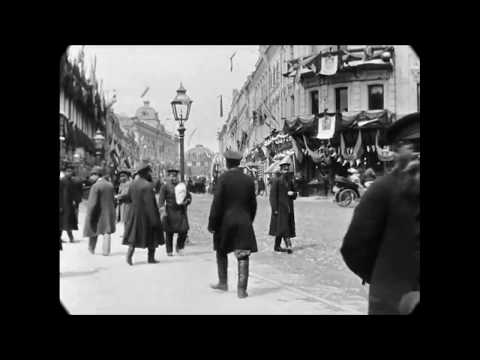

In [0]:
#@title Укажите адрес видео
you_url = 'https://www.youtube.com/watch?v=FYHF3a9R5DY' #@param {type: "string"}
ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([you_url])
with ydl:
    result = ydl.extract_info(
        you_url,
        download=False # We just want to extract the info
    )

if 'entries' in result:
    # Can be a playlist or a list of videos
    video = result['entries'][0]
else:
    # Just a video
    video = result
print ('Продолжительность:', video['duration'])
print ('Video ID:', video['display_id'])
print ('Название:', video['title'])
print ('Дата загрузки:', video['upload_date'])
print ('Количество просмотров:', video['view_count'])
print (video['webpage_url'])
filename = video['title'] + '-' + video['display_id'] + '.mkv'
print(filename)
YouTubeVideo(video['display_id'])

#Кадрируем видео
В cv2.VideoCapture ('video.mkv') мы просто должны упомянуть название видео с его расширением. Нужно установить частоту кадров, которая широко известна как fps (кадров в секунду). Здесь я установил 0,5, чтобы он захватывал кадр каждые 0,5 секунды, то есть 2 кадра (изображения) за каждую секунду.
Это сохранит изображения с именем как image1.jpg, image2.jpg и так далее.

In [0]:
import cv2
vidcap = cv2.VideoCapture('May 1896 - Tverskaya Street in Moscow, Russia (speed corrected w_ added sound)-FYHF3a9R5DY.mkv')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # кадры сохраняем в .jpg
    return hasFrames
sec = 0
fps = 25 #25 кадров в секунду
frameRate = 1 / fps  #//кадрирование 25 кадров в секунду
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [0]:
# OpenCV, NumPy, and urllib
def url_to_image(url):
	#Скачиваем изображение, конвертируем его NumPy array и читаем в CV
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

Идем на сайт [Image Colorization API](https://deepai.org/machine-learning-model/colorizer), регистрируемся и получаем свой api-key для доступа к колорайзеру.



#Добавляем цвет

1300


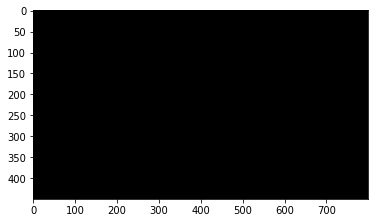

In [0]:
for num in range(1154, 1313):
    image_name = 'image' + str(num) + '.jpg'
    #cimage_name = 'cimage' + str(num) + '.jpg' #если нужно цвет сохранять отдельно
    r = requests.post(
        "https://api.deepai.org/api/colorizer",
        files={
            'image': open(image_name, 'rb'),
        },
        headers={'api-key': %env api_key}
    )
    response = r.json()
    image_from_url = url_to_image(response['output_url'])
    cv2.imwrite(image_name, image_from_url)
    #cv2.imwrite(cimage_name, image_from_url)
    if num % 25 == 0:
        output.clear()
        print (num)
        plt.imshow(image_from_url)
        plt.show()

#Монтируем цветное видео 

In [0]:
pathIn= './'
pathOut = 'video.avi'
fps = 25 #можно поменять fps длч видео
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#files = [f for f in files if f[0] == 'c'] #фильтруем цветные изображения если  в перемешку с чб
files.sort(key = lambda x: int(x[6:-4])) #сортируем по цифрам 2-3 значные
#files.sort()

In [0]:
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
print('Изображения собраны! - fps = ', fps, '-fps')
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()
print ('Готово!')

Изображения собраны! - fps =  25
Готово!
